# Analysis of Paleo Temperature, CO2 and Methane changes over the past 800,000 years

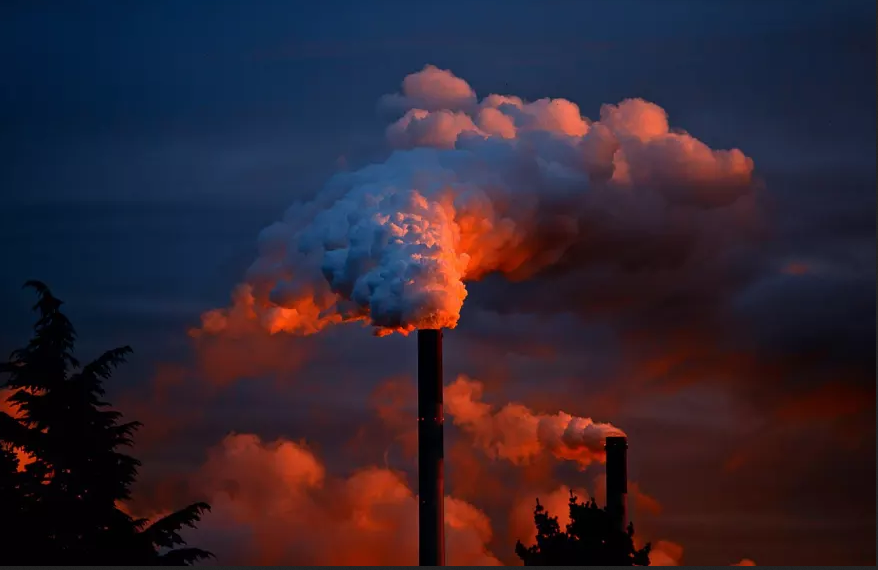

Greenhouse gases began with the onset of the industrial era around 1750. Picture: Pixabay

***
Author: Emma Dunleavy

Student Number: g00425660

Module: Programming for Data Analysis Winter 2023/24 

Lecturer: Brian McGinley
***

Required libraries.

In [511]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import scipy.stats as ss
import sklearn.neighbors as nei
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 5]

In [512]:
warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="alert alert-block alert-info"><b>Note:</b> For Paleo data sets the age unit is in calendar years before present (yr BP) whereas present refers to 1950.</div>


### CO2 From 800kyrs to Present 

Reading in CO2 data from https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls saved locally as "correctedantarctica2015co2.csv".

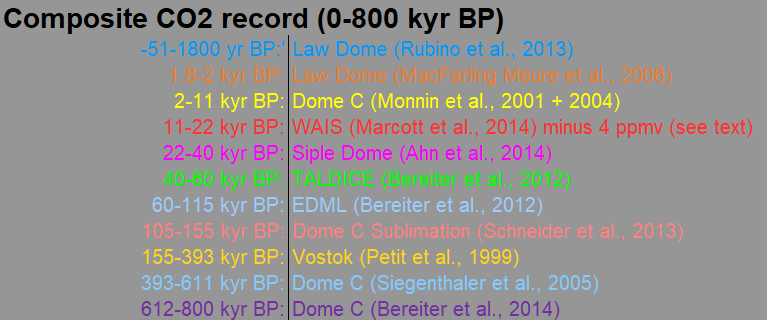

In [513]:
# Read in CO2 data.
co2df=pd.read_csv('correctedantarctica2015co2.csv', skiprows=14, usecols=[0,1,])

In [514]:
# Show dataframe.
co2df

Gasage (yr BP)  CO2 (ppmv)
0             -51.03      368.02
1             -48.00      361.78
2             -46.28      359.65
3             -44.41      357.11
4             -43.08      353.95
...              ...         ...
1896       803925.28      202.92
1897       804009.87      207.50
1898       804522.67      204.86
1899       805132.44      202.23
1900       805668.87      207.29

[1901 rows x 2 columns]

In [515]:
base_year = 1950
co2df['Gasage (yr BP)'] = base_year - co2df['Gasage (yr BP)']

In [516]:
co2df

Gasage (yr BP)  CO2 (ppmv)
0            2001.03      368.02
1            1998.00      361.78
2            1996.28      359.65
3            1994.41      357.11
4            1993.08      353.95
...              ...         ...
1896      -801975.28      202.92
1897      -802059.87      207.50
1898      -802572.67      204.86
1899      -803182.44      202.23
1900      -803718.87      207.29

[1901 rows x 2 columns]

In [517]:
# Convert year to int.
co2df['year_co2'] = co2df['Gasage (yr BP)'].astype(int)

In [518]:
# Show dataframe.
co2df

Gasage (yr BP)  CO2 (ppmv)  year_co2
0            2001.03      368.02      2001
1            1998.00      361.78      1998
2            1996.28      359.65      1996
3            1994.41      357.11      1994
4            1993.08      353.95      1993
...              ...         ...       ...
1896      -801975.28      202.92   -801975
1897      -802059.87      207.50   -802059
1898      -802572.67      204.86   -802572
1899      -803182.44      202.23   -803182
1900      -803718.87      207.29   -803718

[1901 rows x 3 columns]

[Text(0.5, 1.0, 'Corrected Composite CO2 800kyrs to Present')]

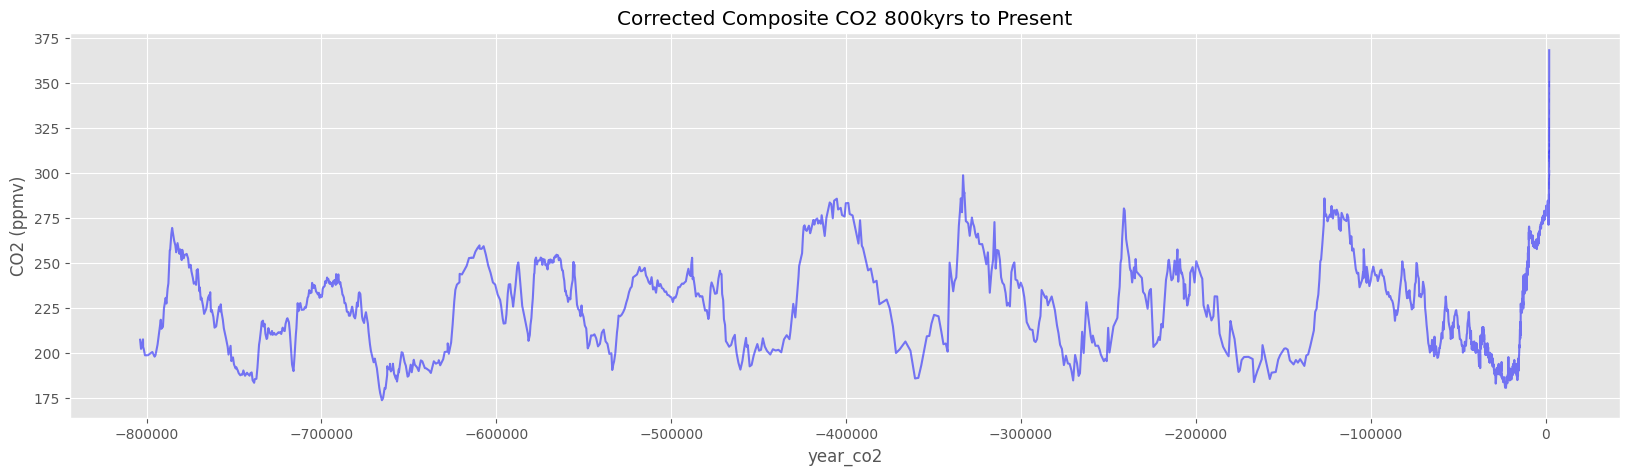

In [519]:
# Plot CO2 data on lineplot.
sns.lineplot(data=co2df, x='year_co2', y='CO2 (ppmv)', color='blue', alpha = 0.5).set(title='Corrected Composite CO2 800kyrs to Present')

In [520]:
# Convert co2 reading to numpy array.
co2 = co2df['CO2 (ppmv)'].to_numpy()

# Show.
co2

array([368.02, 361.78, 359.65, ..., 204.86, 202.23, 207.29])

In [521]:
# Get mean of CO2 readings.
co2_mean = co2.mean()

# Show.
co2_mean

235.56669121514994

In [522]:
# Get standard deviation of CO2 readings.
co2_std = co2.std()

# Show. 
co2_std

35.89326179283893

### CO2 Frequency Analysis

Text(0.5, 1.0, 'CO2 Frequency Analysis - Histogram')

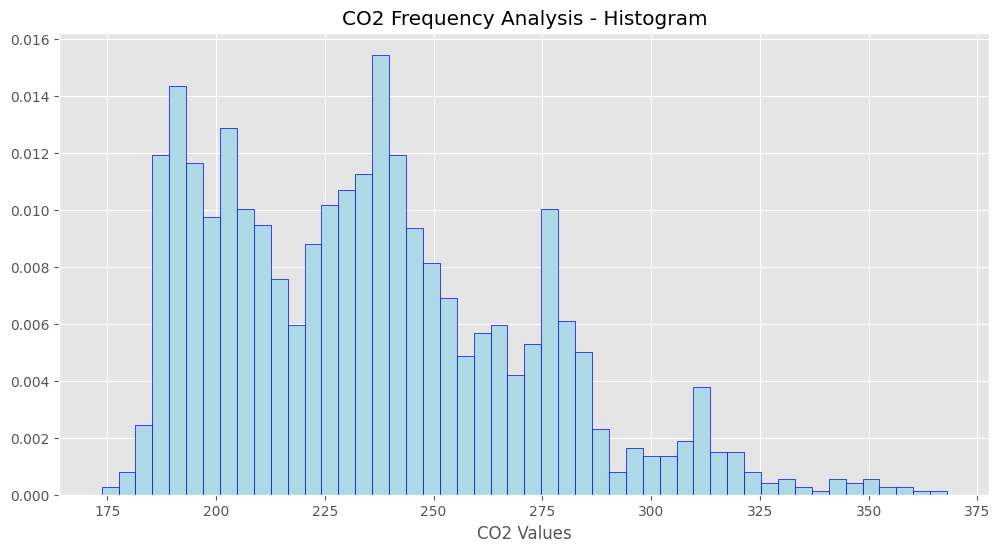

In [523]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Plot CO2 data on histogram.
ax.hist(co2, bins=50, density=True, color="lightblue", ec="blue" )

# Add x-axis lable. 
plt.xlabel('CO2 Values')

# Add title.
plt.title('CO2 Frequency Analysis - Histogram')

Text(0.5, 1.0, 'CO2 Frequency Analysis - KDE Plot')

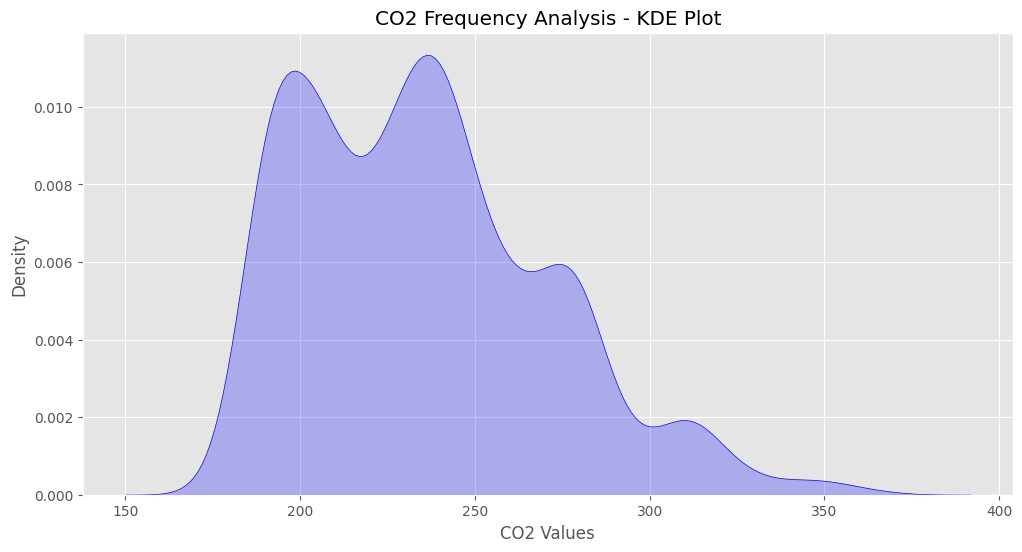

In [524]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Plot CO2 data on KDE plot.
sns.kdeplot(co2, fill=True, color="Blue")

# Add x-axis label.
plt.xlabel('CO2 Values')

# Add y-axis label.
plt.ylabel('Density')

#Add title. 
plt.title('CO2 Frequency Analysis - KDE Plot')


The output is a multimodal distribution with two main peaks, one at 195ppmv and a second at 240ppmv and a third, smaller peak at 275ppmv. There is an increased frequency of CO2 readings in the data set at these values. 

### Temperature 


Temperature data attained from https://vlegalwaymayo.atu.ie/mod/resource/view.php?id=874744. The original source is at

https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt, extracted and saved locally in a csv file called 'temperaturedata.csv'.

In [525]:
# Read in csv file.
tempdf=pd.read_csv('temperaturedata.csv',  usecols=[2,5])

In [526]:
# Show.
tempdf

EDC3béta   temp
0        -50.00000  218.3
1        -43.55977  218.3
2        -37.44019  218.3
3        -31.64156  218.3
4        -24.55278  218.3
...            ...    ...
5814  816871.60000  211.0
5815  817693.60000  211.2
5816  818505.50000  211.3
5817  819303.10000  211.4
5818  820093.90000  211.4

[5819 rows x 2 columns]

In [527]:
base_year = 1950
tempdf['EDC3béta'] = base_year - tempdf['EDC3béta']

In [528]:
# Convert year to int.
tempdf['year_temp'] = tempdf['EDC3béta'].astype(int)

In [529]:
tempdf

EDC3béta   temp  year_temp
0       2000.00000  218.3       2000
1       1993.55977  218.3       1993
2       1987.44019  218.3       1987
3       1981.64156  218.3       1981
4       1974.55278  218.3       1974
...            ...    ...        ...
5814 -814921.60000  211.0    -814921
5815 -815743.60000  211.2    -815743
5816 -816555.50000  211.3    -816555
5817 -817353.10000  211.4    -817353
5818 -818143.90000  211.4    -818143

[5819 rows x 3 columns]

[Text(0.5, 1.0, 'Temperature 800kyrs to Present')]

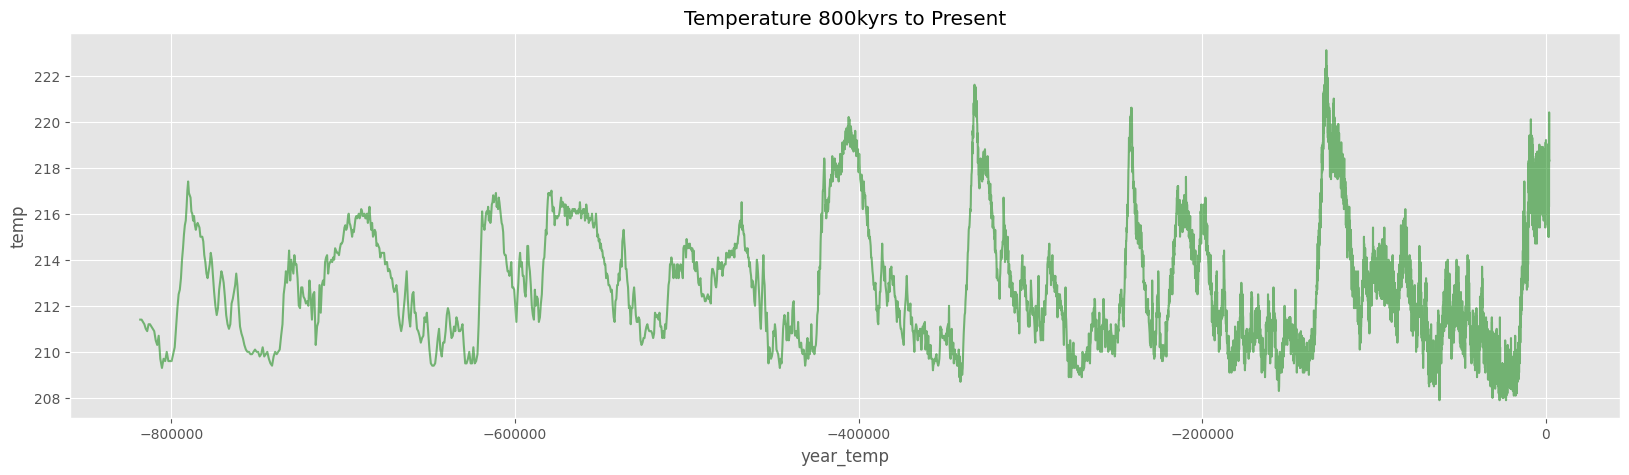

In [530]:
sns.lineplot(data=tempdf, x='year_temp', y='temp', color='green', alpha = 0.5).set(title='Temperature 800kyrs to Present')


In [531]:
year_co2 = co2df[['year_co2','CO2 (ppmv)']]
year_temp = tempdf[['year_temp','temp']]

In [532]:
temp = tempdf['temp'].to_numpy()
temp

array([218.3, 218.3, 218.3, ..., 211.3, 211.4, 211.4])

In [533]:
temp_mean = tempdf['temp'].mean()
temp_mean

213.4747207423956

Text(0.5, 1.0, 'Temperature Frequency Analysis - Histogram')

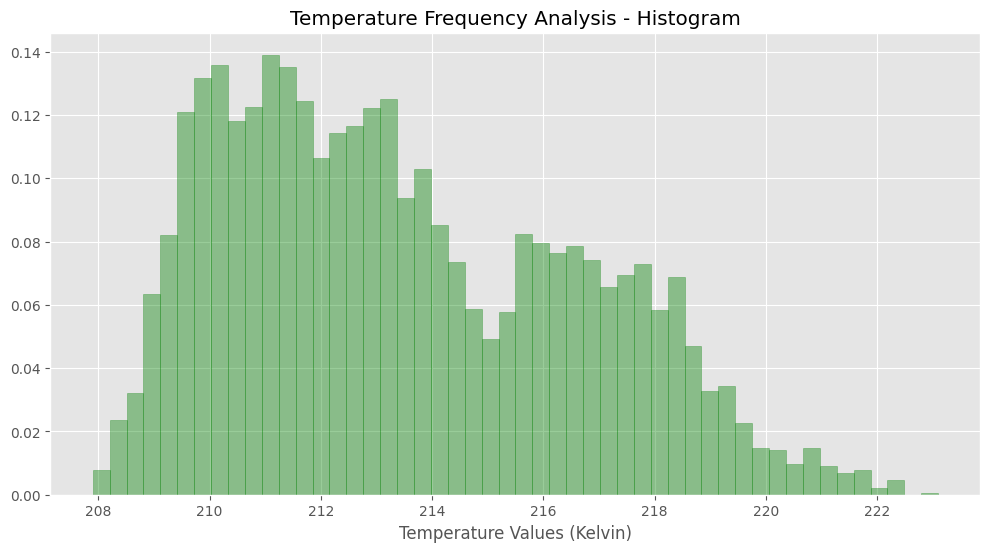

In [534]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Plot temp data.
ax.hist(temp, bins=50, density=True, color="green", alpha = 0.4, ec="green" )

# Add x-axis label.
plt.xlabel('Temperature Values (Kelvin)')

# Add y-axis label.
plt.title('Temperature Frequency Analysis - Histogram')

Text(0.5, 1.0, 'Temperature Frequency Analysis - KDE')

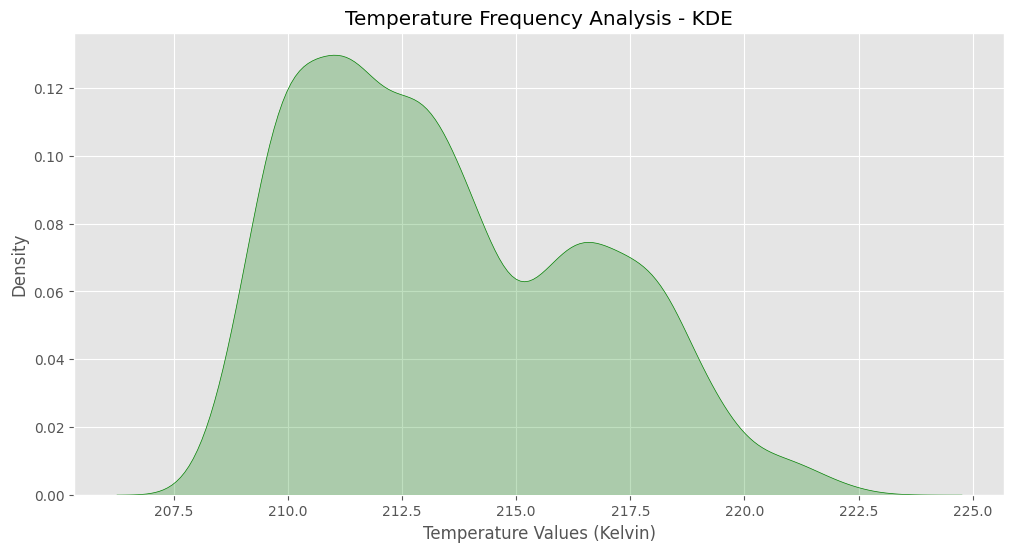

In [535]:
# Plotting. 
fig, ax = plt.subplots(figsize=(12,6))

# Plot the temp data.
sns.kdeplot(temp, fill=True, color="Green")

# Add x axis label. 
plt.xlabel('Temperature Values (Kelvin)')

# Add y axis label. 
plt.ylabel('Density')

# Add title.
plt.title('Temperature Frequency Analysis - KDE')

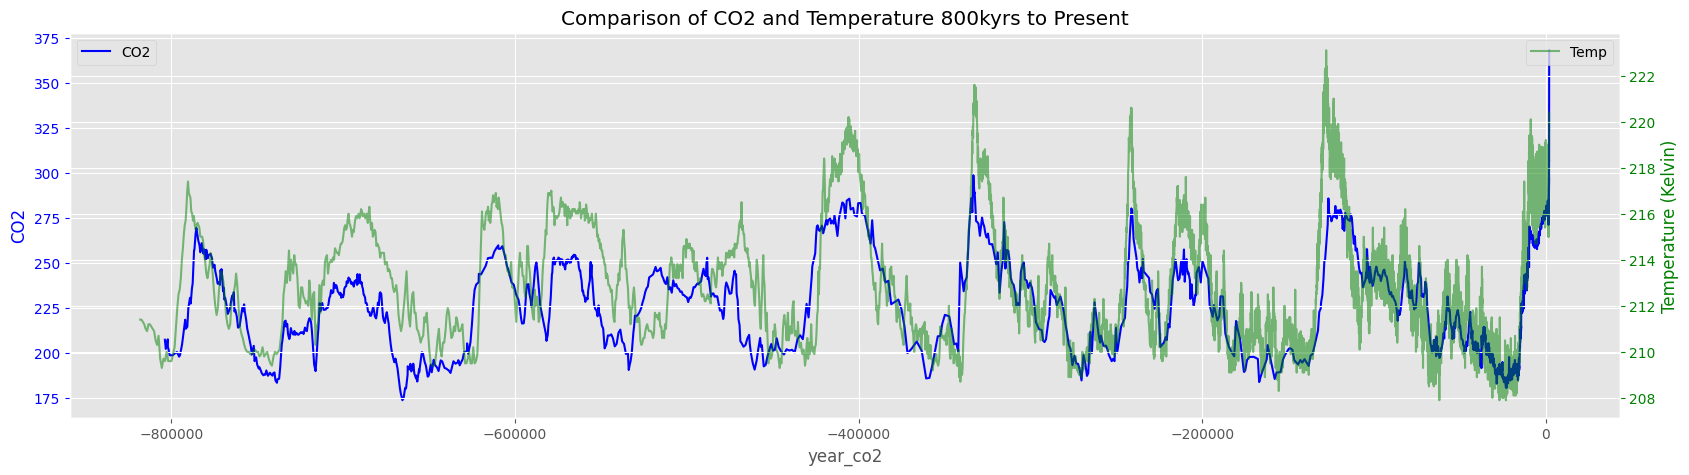

In [536]:
# Plotting.
fig, ax1 = plt.subplots()

# Plot the CO2 data.
ax1.plot(co2df['year_co2'], co2df['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis.
ax2 = ax1.twinx()

# Plot the temperature data on the second y-axis.
ax2.plot(tempdf['year_temp'], tempdf['temp'], label='Temp', color='green',alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Add legend.
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title.
plt.title('Comparison of CO2 and Temperature 800kyrs to Present')

# Display the plot.
plt.show()

### Methane

Methane data from https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt converted from txt file to csv file.

In [537]:
# Read the content of the file
with open('Methane CH4 800kyrs to present.txt', 'r') as file:
    lines = file.readlines()

# Process each line and add commas
lines_with_commas = []
for line in lines:
    columns = line.strip().split()  
    line_with_commas = ','.join(columns) + '\n'
    lines_with_commas.append(line_with_commas)

# Write the modified content back to the file
with open('Methane CH4 800kyrs to present.csv', 'w') as file:
    file.writelines(lines_with_commas)

Creating Methane dataframe.

Gas Age (EDC3 gas age, years before 1950 AD)

In [538]:
ch4df=pd.read_csv('Methane CH4 800kyrs to present.csv')
ch4df

Depth  GasAge  CH4mean    1s Lab.
0       99.34      13      907  10.0    b
1      102.45     126      784  10.0    g
2      102.58     130      762  10.0    b
3      103.34     151      710  10.0    g
4      104.33     184      727  10.0    g
...       ...     ...      ...   ...  ...
2098  3188.08  794938      428  10.0    g
2099  3188.95  796320      418  10.0    b
2100  3189.43  797277      396  10.0    g
2101  3190.03  798417      458  10.0    g
2102  3190.53  799396      399  10.0    g

[2103 rows x 5 columns]

In [539]:
base_year = 1950
ch4df['GasAge'] = base_year - ch4df['GasAge']

In [540]:
ch4df['GasAge'] = ch4df['GasAge'].astype(int)

In [541]:
ch4df

Depth  GasAge  CH4mean    1s Lab.
0       99.34    1937      907  10.0    b
1      102.45    1824      784  10.0    g
2      102.58    1820      762  10.0    b
3      103.34    1799      710  10.0    g
4      104.33    1766      727  10.0    g
...       ...     ...      ...   ...  ...
2098  3188.08 -792988      428  10.0    g
2099  3188.95 -794370      418  10.0    b
2100  3189.43 -795327      396  10.0    g
2101  3190.03 -796467      458  10.0    g
2102  3190.53 -797446      399  10.0    g

[2103 rows x 5 columns]

[Text(0.5, 1.0, 'Methane Trend 800kyrs to Present')]

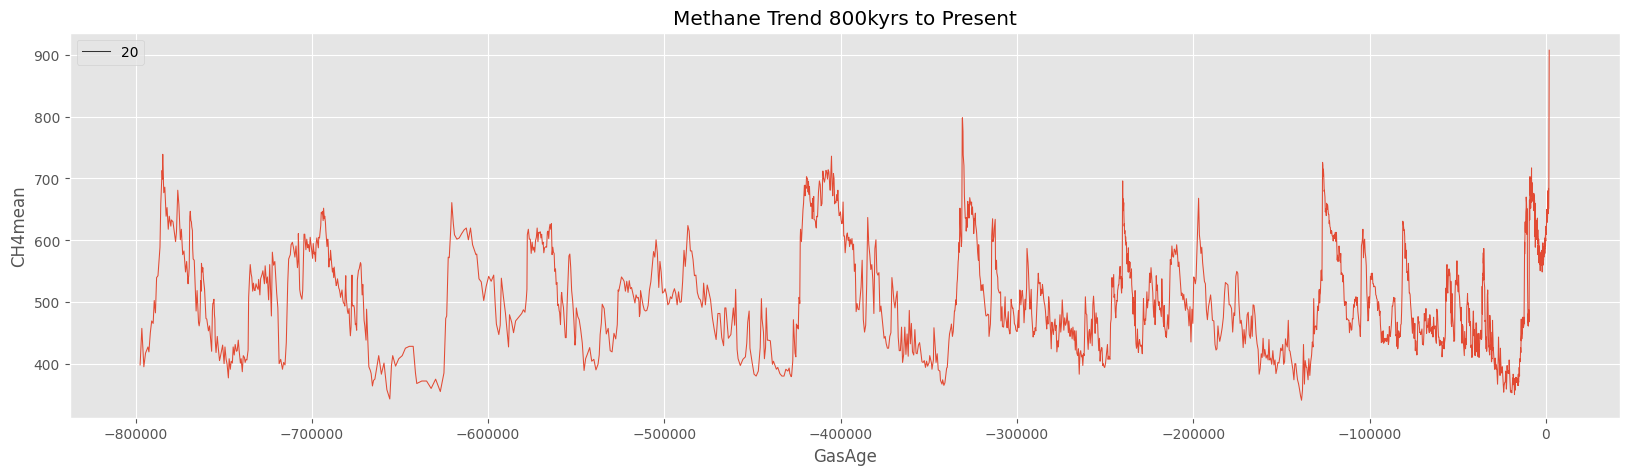

In [542]:
sns.lineplot(data=ch4df, x='GasAge', y='CH4mean',size=20).set(title='Methane Trend 800kyrs to Present')

In [543]:
methane = ch4df['CH4mean'].to_numpy()
methane

array([907, 784, 762, ..., 396, 458, 399], dtype=int64)

Text(0.5, 1.0, 'Methane Frequency Analysis - Histogram')

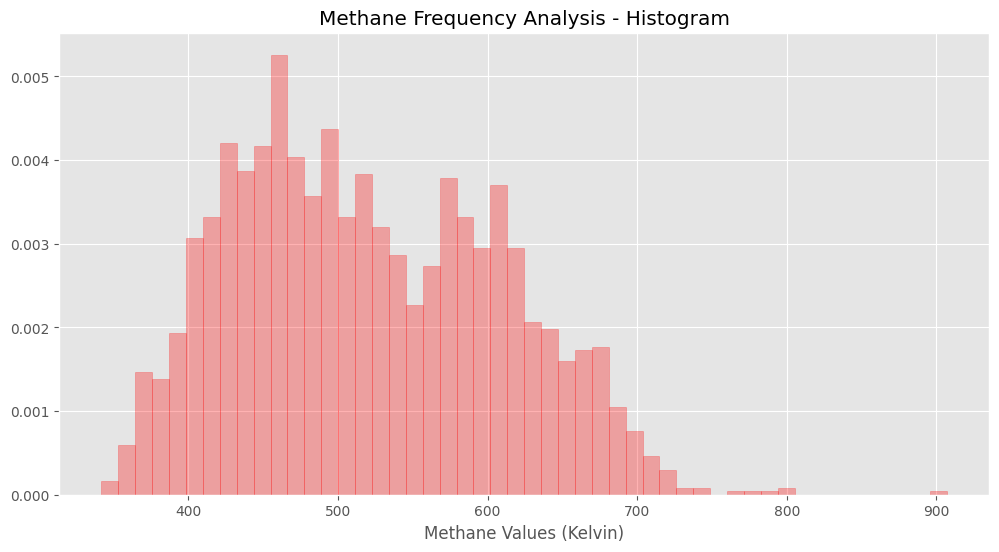

In [544]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(methane, bins=50, density=True, color="red", alpha = 0.3, ec="red" )
plt.xlabel('Methane Values (Kelvin)')
plt.title('Methane Frequency Analysis - Histogram')

<Axes: ylabel='Density'>

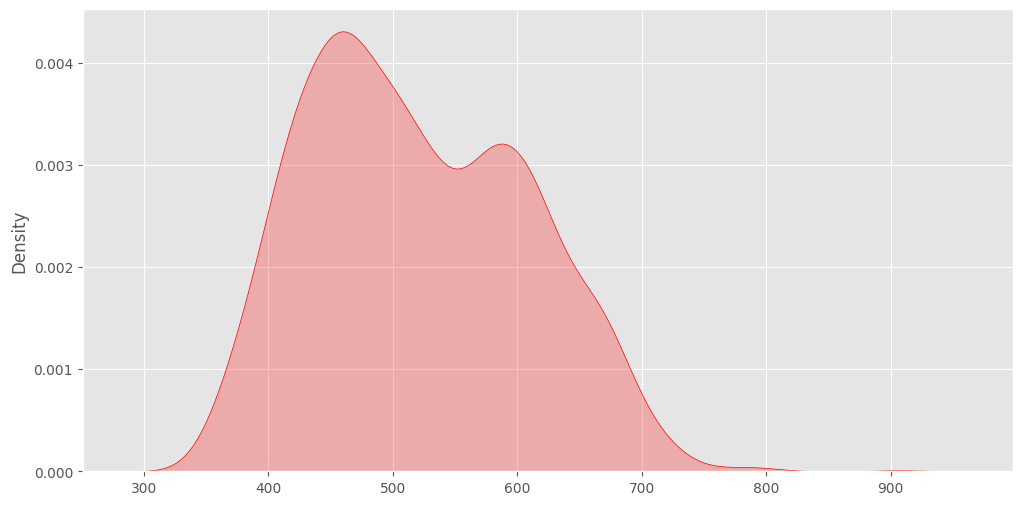

In [545]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(methane, fill=True, color="Red")

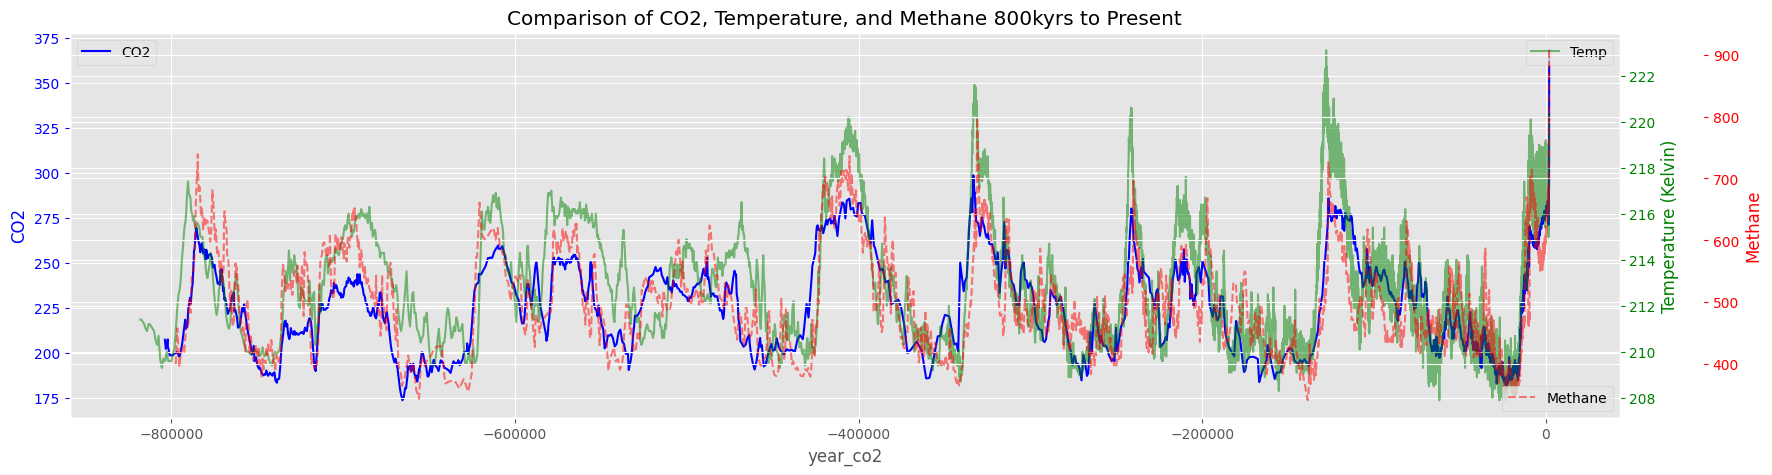

In [546]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2df['year_co2'], co2df['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(tempdf['year_temp'], tempdf['temp'], label='Temp', color='green', alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third set of data on the third y-axis
ax3.plot(ch4df['GasAge'], ch4df['CH4mean'], label='Methane', color='red', linestyle='dashed', alpha=0.5)
ax3.set_ylabel('Methane', color='red')
ax3.tick_params('y', colors='red')

# Move the spine of the third y-axis to the right to avoid overlapping
ax3.spines['right'].set_position(('outward', 60))

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

# Add title
plt.title('Comparison of CO2, Temperature, and Methane 800kyrs to Present')

# Display the plot
plt.show()

The above graph depicts how CO2 (blue), temperature (green) and methane (red) has trended over the past 800,000 years. The trend shows a very strong correlation between the three variables and of the three temperature is the leading variable and CO2 and methane lagging slightly. Across the 800,000 years there are several cycles of peaks and troughs, with peaks getting progressively higher and are longer in duration, particularly in the past 400k years as it draws closer to present day.

<Axes: ylabel='Density'>

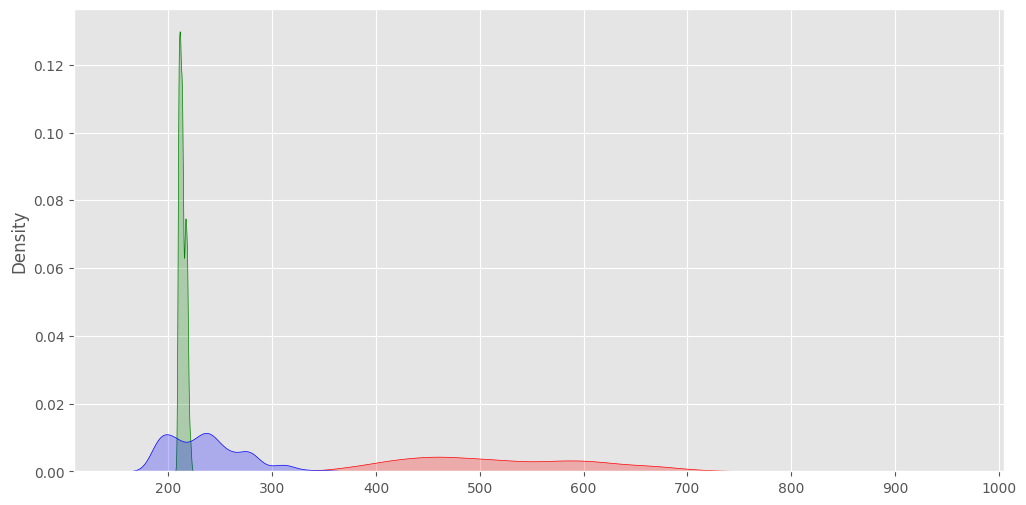

In [547]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(methane, fill=True, color="Red")
sns.kdeplot(temp, fill=True, color="Green")
sns.kdeplot(co2, fill=True, color="Blue")

Although not comparing apples with apples it is interesting to observe the differences in the range of each of the three. variables 

In [548]:
year_ch4 = ch4df[['GasAge','CH4mean']]

In [549]:
year_ch4

GasAge  CH4mean
0       1937      907
1       1824      784
2       1820      762
3       1799      710
4       1766      727
...      ...      ...
2098 -792988      428
2099 -794370      418
2100 -795327      396
2101 -796467      458
2102 -797446      399

[2103 rows x 2 columns]

### Irish Data

Median monthly data from 1711 to 2016

In [550]:
ire_df = pd.read_csv("https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-1711-2016.zip")

In [551]:
ire_df['Date'] = pd.to_datetime(ire_df['Year'].astype(str) + ire_df['Month'].astype(str), format='%Y%m')

In [552]:
ire_df

Year  Month  Median montly series       Date
0     1711      1                  16.4 1711-01-01
1     1711      2                  73.1 1711-02-01
2     1711      3                 121.2 1711-03-01
3     1711      4                  85.2 1711-04-01
4     1711      5                  66.6 1711-05-01
...    ...    ...                   ...        ...
3667  2016      8                  79.1 2016-08-01
3668  2016      9                 108.1 2016-09-01
3669  2016     10                  51.8 2016-10-01
3670  2016     11                  58.0 2016-11-01
3671  2016     12                  92.1 2016-12-01

[3672 rows x 4 columns]

<Axes: xlabel='Date', ylabel='Median montly series'>

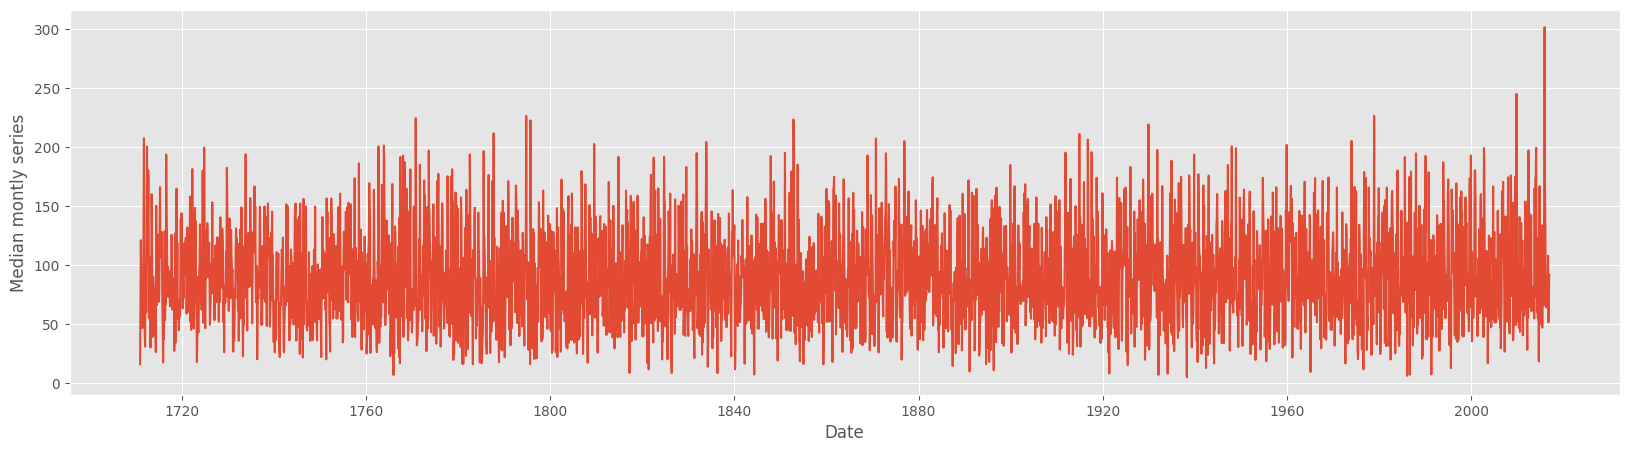

In [553]:
sns.lineplot(data=ire_df, x='Date', y='Median montly series' )

<Axes: ylabel='Median montly series'>

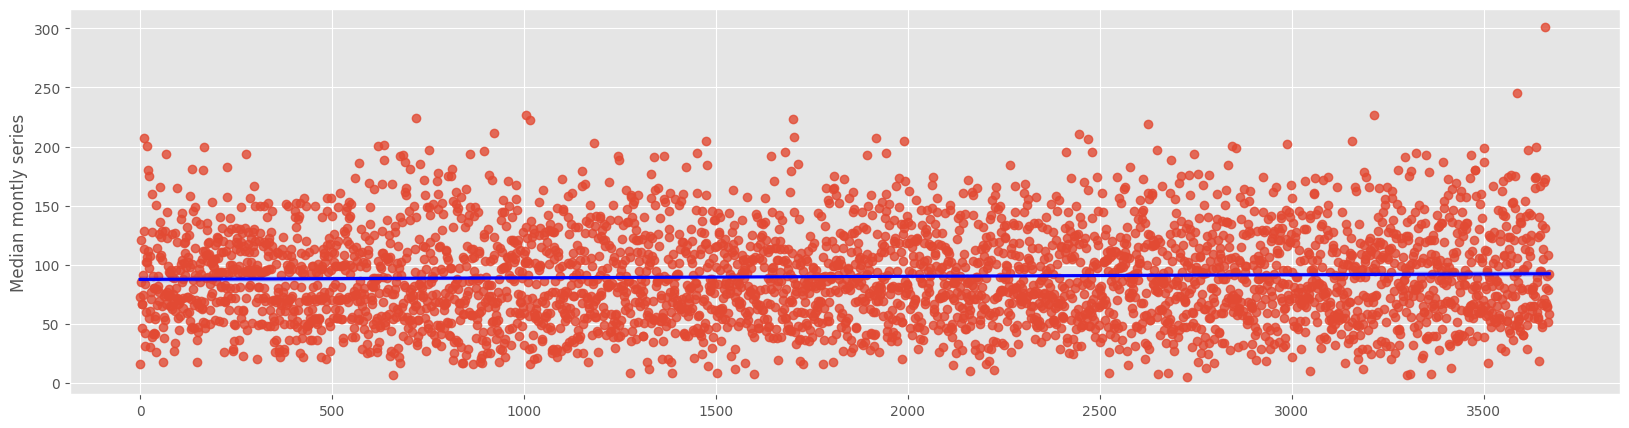

In [554]:
sns.regplot(x=ire_df.index, y="Median montly series", data=ire_df,  line_kws={"color": "blue"})

In [555]:
ire_df.to_csv('irelandrainfall.csv', index=False) 

In [556]:
# Calculating the yearly median
yearly_median = ire_df.groupby('Year')['Median montly series'].median()

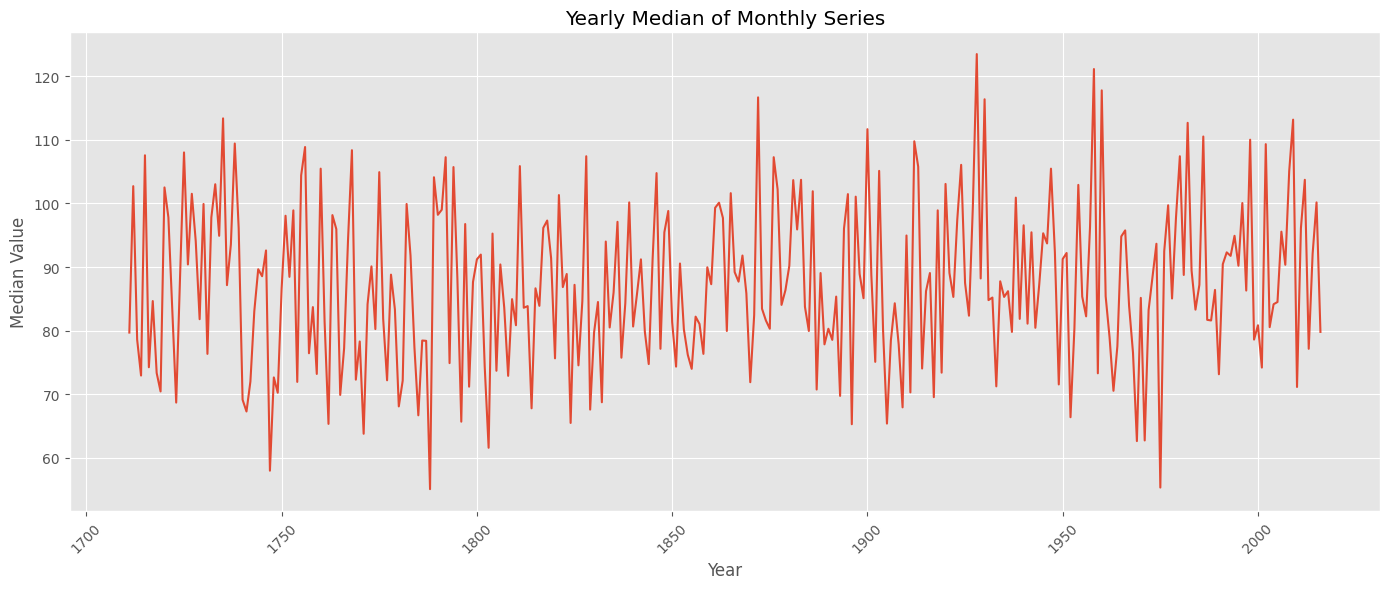

In [557]:
# Plotting the yearly median
plt.figure(figsize=(14, 6))
yearly_median.plot(kind='line')
plt.title('Yearly Median of Monthly Series')
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.xticks(rotation=45)
plt.tight_layout()

### Comparing Rainfall in Mayo to Wexford

In [558]:
mayo_rain_df=pd.read_csv('Mayo_Rainfall.csv', skiprows=19, usecols=[0,1,7,])

In [559]:
mayo_rain_df

year  month   rain
0    1956      9   49.9
1    1956     10   98.8
2    1956     11   51.6
3    1956     12  180.6
4    1957      1  148.5
..    ...    ...    ...
797  2023      7  148.5
798  2023      8  117.2
799  2023      9   77.2
800  2023     10  100.0
801  2023     11  139.7

[802 rows x 3 columns]

In [560]:
mayo_rain_df['mayo_date'] = pd.to_datetime(mayo_rain_df['year'].astype(str) + mayo_rain_df['month'].astype(str), format='%Y%m')

In [561]:
mayo_rain_df['mayo_rain'] = mayo_rain_df['rain']

In [562]:
mayo_rain_df

year  month   rain  mayo_date  mayo_rain
0    1956      9   49.9 1956-09-01       49.9
1    1956     10   98.8 1956-10-01       98.8
2    1956     11   51.6 1956-11-01       51.6
3    1956     12  180.6 1956-12-01      180.6
4    1957      1  148.5 1957-01-01      148.5
..    ...    ...    ...        ...        ...
797  2023      7  148.5 2023-07-01      148.5
798  2023      8  117.2 2023-08-01      117.2
799  2023      9   77.2 2023-09-01       77.2
800  2023     10  100.0 2023-10-01      100.0
801  2023     11  139.7 2023-11-01      139.7

[802 rows x 5 columns]

In [563]:
mayo = mayo_rain_df[['mayo_date','mayo_rain']].copy()

<Axes: xlabel='mayo_date', ylabel='mayo_rain'>

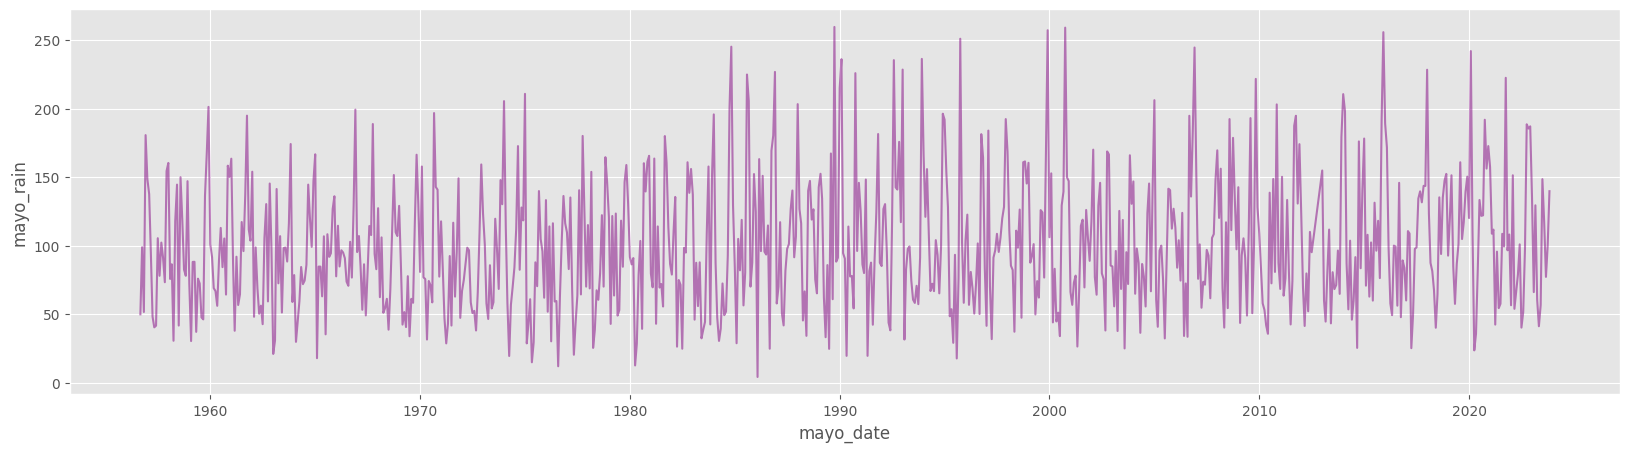

In [564]:
sns.lineplot(data=mayo, x='mayo_date', y='mayo_rain', color = 'purple', alpha = 0.5 )

<Axes: ylabel='mayo_rain'>

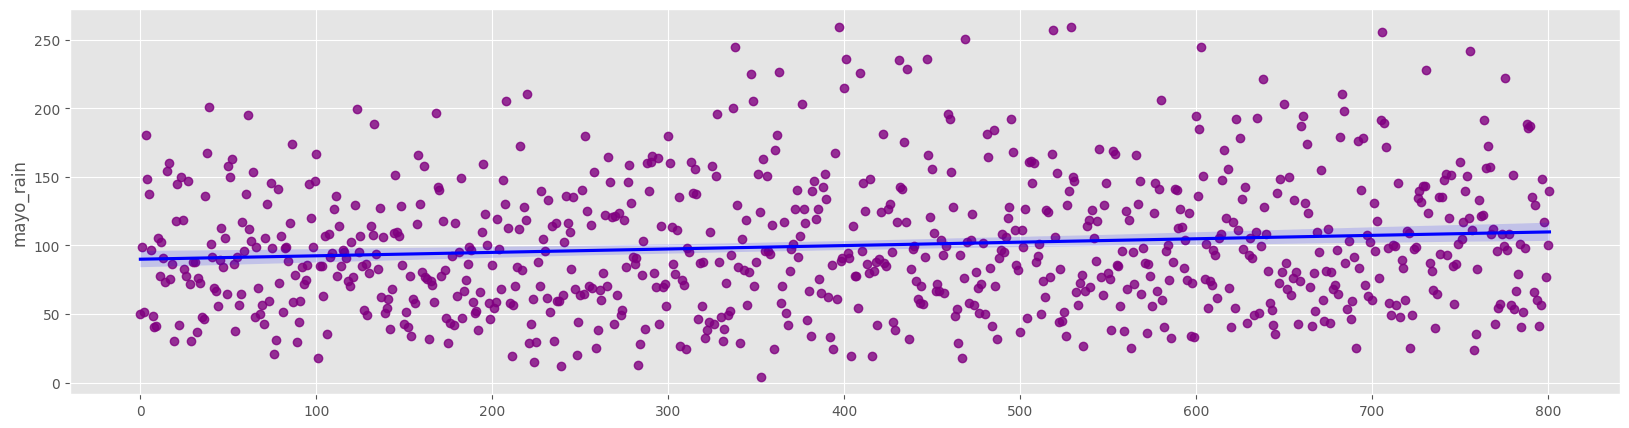

In [565]:
sns.regplot(x=mayo.index, y="mayo_rain", data=mayo, color ='purple', line_kws={"color": "blue"})

In [566]:
wexford_rain_df=pd.read_csv('Wexford_Rainfall.csv', skiprows=13, usecols=[0,1,3])
wexford_rain_df['wex_date'] = pd.to_datetime(wexford_rain_df['year'].astype(str) + wexford_rain_df['month'].astype(str), format='%Y%m')
wexford_rain_df['wexford_rain'] = wexford_rain_df['rain']


In [567]:
wexford_rain_df 

year  month   rain   wex_date  wexford_rain
0    1987      9  100.5 1987-09-01         100.5
1    1987     10  176.7 1987-10-01         176.7
2    1987     11   67.7 1987-11-01          67.7
3    1987     12   91.5 1987-12-01          91.5
4    1988      1  205.4 1988-01-01         205.4
..    ...    ...    ...        ...           ...
425  2023      4   62.5 2023-04-01          62.5
426  2023      5   34.7 2023-05-01          34.7
427  2023      6   71.3 2023-06-01          71.3
428  2023      7  117.5 2023-07-01         117.5
429  2023      8   88.9 2023-08-01          88.9

[430 rows x 5 columns]

In [568]:
wexford = wexford_rain_df[['wex_date','wexford_rain']].copy()

<Axes: xlabel='wex_date', ylabel='wexford_rain'>

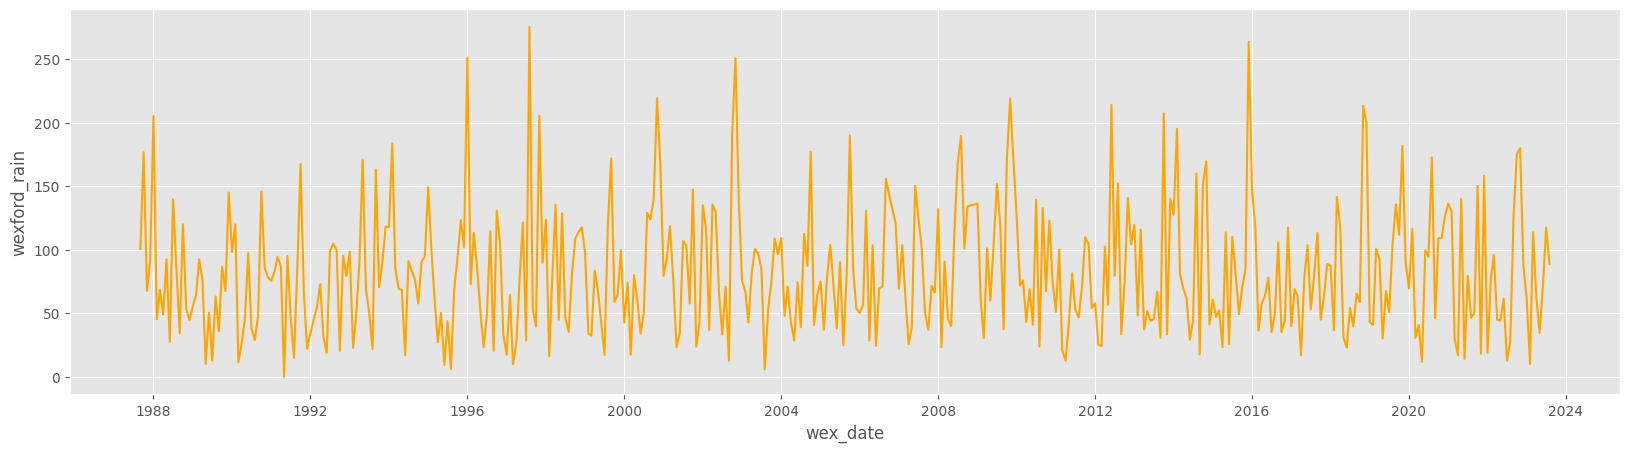

In [569]:
sns.lineplot(data=wexford, x="wex_date", y="wexford_rain", color = 'orange')

<Axes: ylabel='rain'>

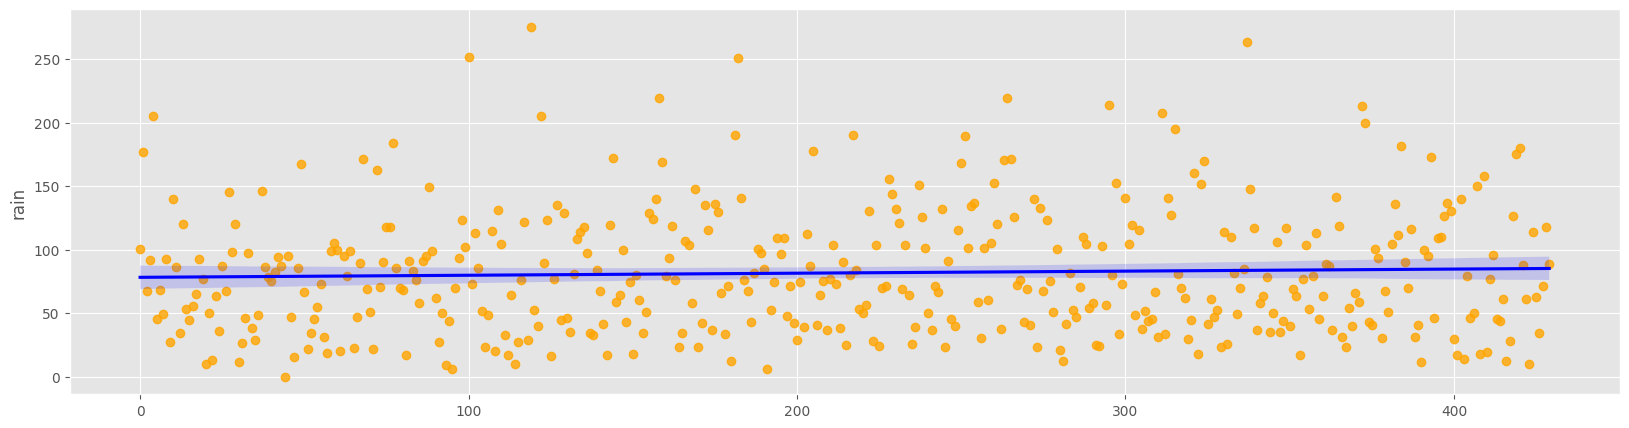

In [570]:
sns.regplot(x=wexford.index, y="rain", data=wexford_rain_df, color= 'orange', line_kws={"color": "blue"})

### Combining Data Sets

In [571]:
ireland_rain_df = pd.concat([mayo, wexford], axis =1)

In [572]:
ireland_rain_df

mayo_date  mayo_rain   wex_date  wexford_rain
0   1956-09-01       49.9 1987-09-01         100.5
1   1956-10-01       98.8 1987-10-01         176.7
2   1956-11-01       51.6 1987-11-01          67.7
3   1956-12-01      180.6 1987-12-01          91.5
4   1957-01-01      148.5 1988-01-01         205.4
..         ...        ...        ...           ...
797 2023-07-01      148.5        NaT           NaN
798 2023-08-01      117.2        NaT           NaN
799 2023-09-01       77.2        NaT           NaN
800 2023-10-01      100.0        NaT           NaN
801 2023-11-01      139.7        NaT           NaN

[802 rows x 4 columns]

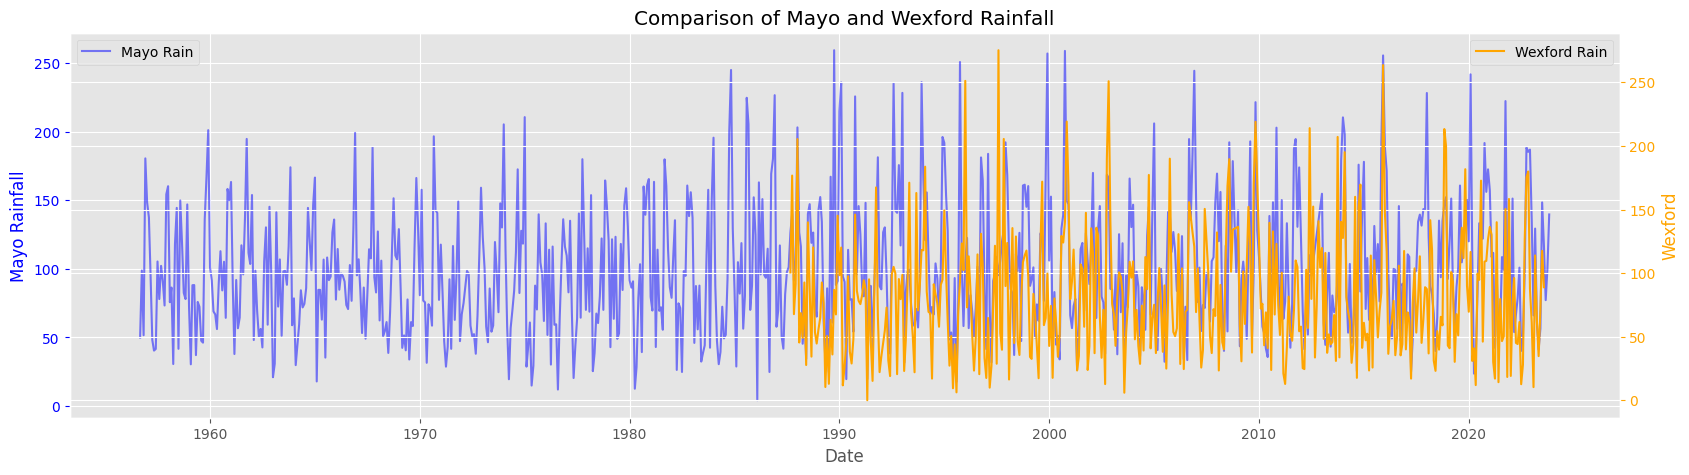

In [573]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(ireland_rain_df['mayo_date'], ireland_rain_df['mayo_rain'], label='Mayo Rain', color='blue', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Mayo Rainfall', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(ireland_rain_df['wex_date'], ireland_rain_df['wexford_rain'], label='Wexford Rain', color='orange')
ax2.set_ylabel('Wexford', color='orange')
ax2.tick_params('y', colors='orange')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of Mayo and Wexford Rainfall')

# Display the plot
plt.show()

In [574]:
reduced_mayo = mayo.iloc[372: ].reset_index(0)

In [575]:
reduced_mayo

index  mayo_date  mayo_rain
0      372 1987-09-01      126.7
1      373 1987-10-01      140.2
2      374 1987-11-01       91.5
3      375 1987-12-01      106.6
4      376 1988-01-01      203.2
..     ...        ...        ...
425    797 2023-07-01      148.5
426    798 2023-08-01      117.2
427    799 2023-09-01       77.2
428    800 2023-10-01      100.0
429    801 2023-11-01      139.7

[430 rows x 3 columns]

In [576]:
mayo_wex = pd.concat([reduced_mayo, wexford], axis =1)

In [577]:
mayo_wex

index  mayo_date  mayo_rain   wex_date  wexford_rain
0      372 1987-09-01      126.7 1987-09-01         100.5
1      373 1987-10-01      140.2 1987-10-01         176.7
2      374 1987-11-01       91.5 1987-11-01          67.7
3      375 1987-12-01      106.6 1987-12-01          91.5
4      376 1988-01-01      203.2 1988-01-01         205.4
..     ...        ...        ...        ...           ...
425    797 2023-07-01      148.5 2023-04-01          62.5
426    798 2023-08-01      117.2 2023-05-01          34.7
427    799 2023-09-01       77.2 2023-06-01          71.3
428    800 2023-10-01      100.0 2023-07-01         117.5
429    801 2023-11-01      139.7 2023-08-01          88.9

[430 rows x 5 columns]

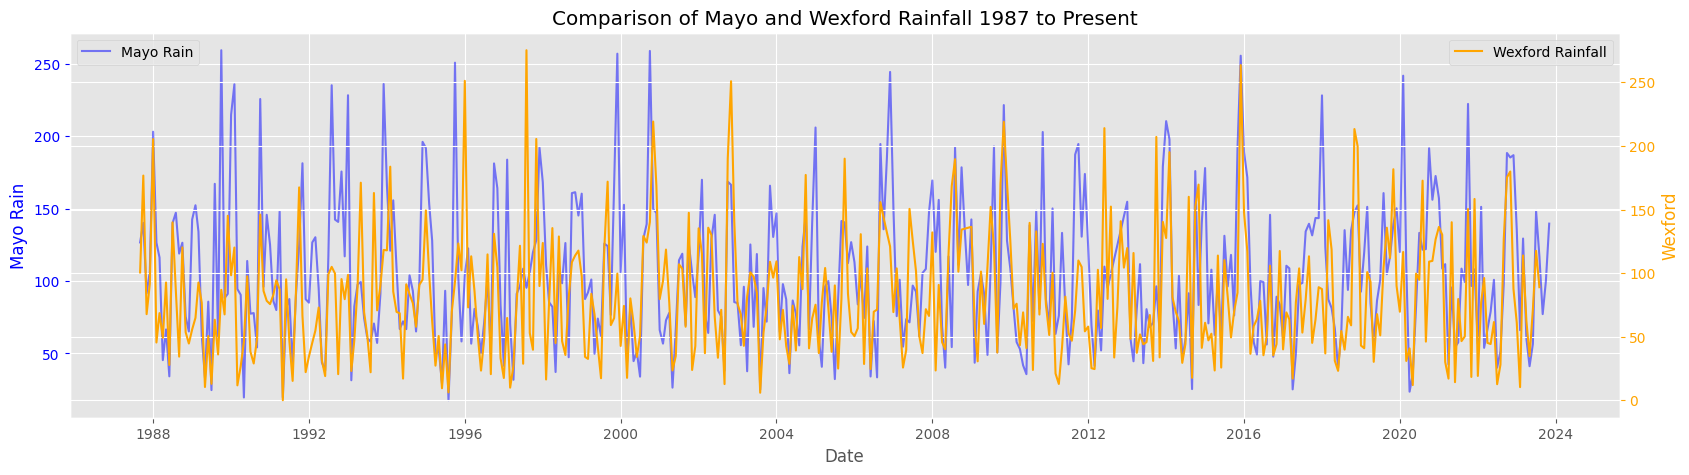

In [578]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(mayo_wex['mayo_date'], mayo_wex['mayo_rain'], label='Mayo Rain', color='blue', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Mayo Rain', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(mayo_wex['wex_date'], mayo_wex['wexford_rain'], label='Wexford Rainfall', color='orange')
ax2.set_ylabel('Wexford', color='orange')
ax2.tick_params('y', colors='orange')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of Mayo and Wexford Rainfall 1987 to Present')

# Display the plot
plt.show()

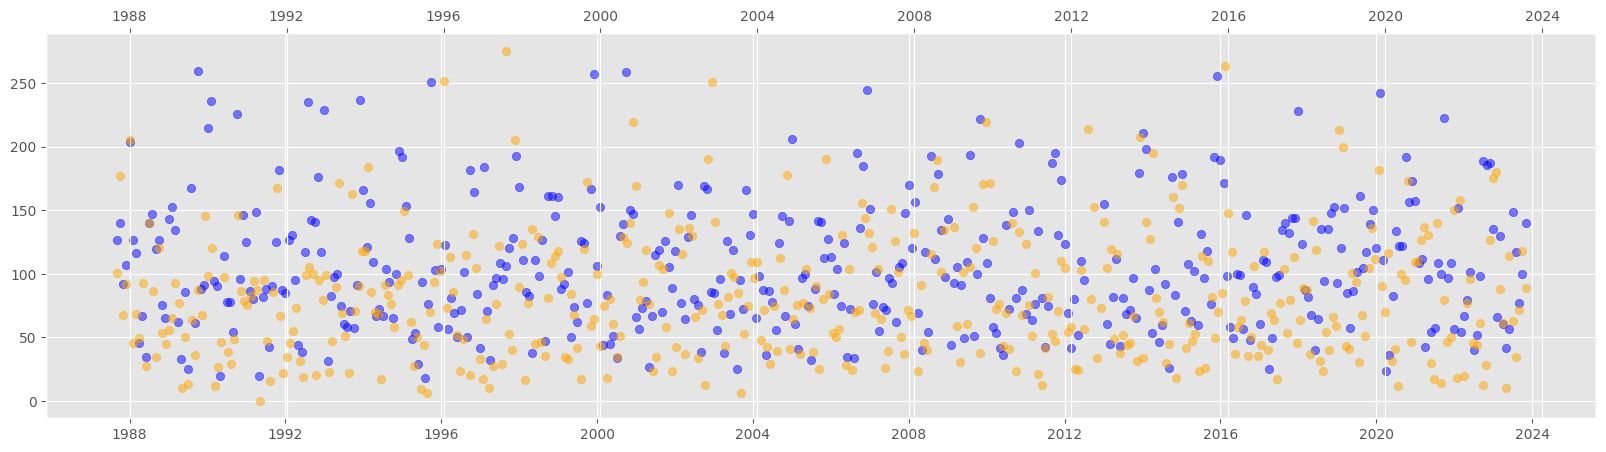

In [579]:
fig, ax = plt.subplots()
ay = ax.twiny()

ax.scatter( mayo_wex['mayo_date'], mayo_wex['mayo_rain'], color='blue', alpha = 0.5)
ay.scatter(mayo_wex['wex_date'], mayo_wex['wexford_rain'],  color='orange', alpha = 0.5)
plt.show()

<Axes: ylabel='rain'>

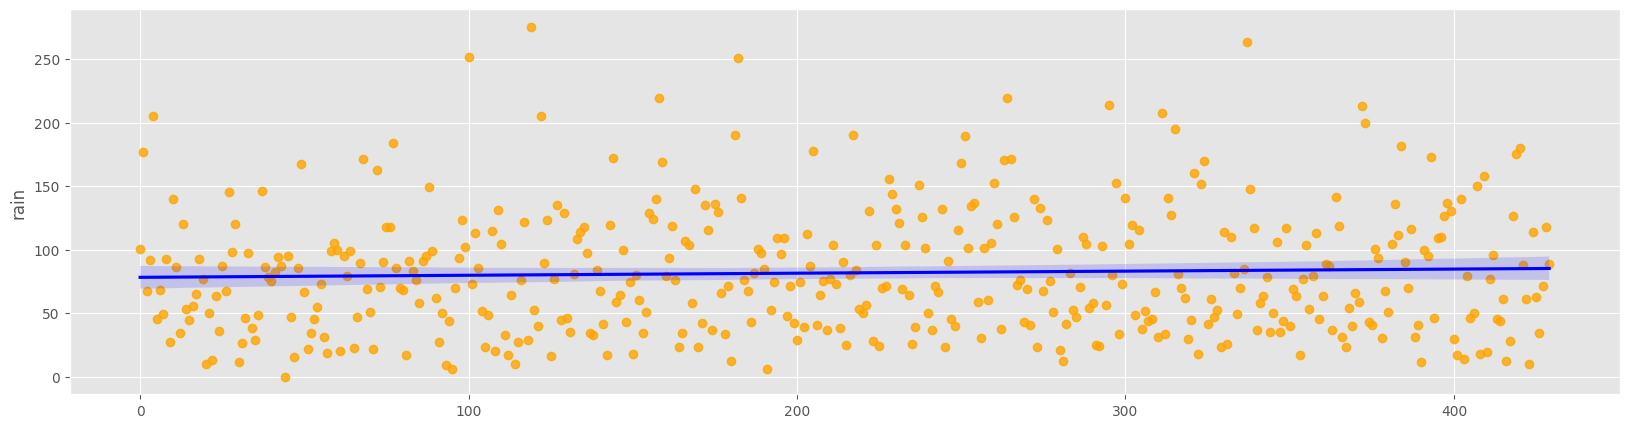

In [580]:
sns.regplot(x=wexford.index, y="rain", data=wexford_rain_df, color='orange', line_kws={"color": "blue"})

(array([0.00076027, 0.00532189, 0.00608216, 0.0076027 , 0.01013693,
        0.00912324, 0.00582874, 0.00988351, 0.0076027 , 0.00684243,
        0.00658901, 0.00608216, 0.00532189, 0.00405477, 0.00405477,
        0.00278766, 0.00228081, 0.00076027, 0.00228081, 0.00126712,
        0.00101369, 0.00050685, 0.00076027, 0.00101369, 0.        ,
        0.        , 0.        , 0.00050685, 0.00025342, 0.00025342]),
 array([  0.        ,   9.17666667,  18.35333333,  27.53      ,
         36.70666667,  45.88333333,  55.06      ,  64.23666667,
         73.41333333,  82.59      ,  91.76666667, 100.94333333,
        110.12      , 119.29666667, 128.47333333, 137.65      ,
        146.82666667, 156.00333333, 165.18      , 174.35666667,
        183.53333333, 192.71      , 201.88666667, 211.06333333,
        220.24      , 229.41666667, 238.59333333, 247.77      ,
        256.94666667, 266.12333333, 275.3       ]),
 <BarContainer object of 30 artists>)

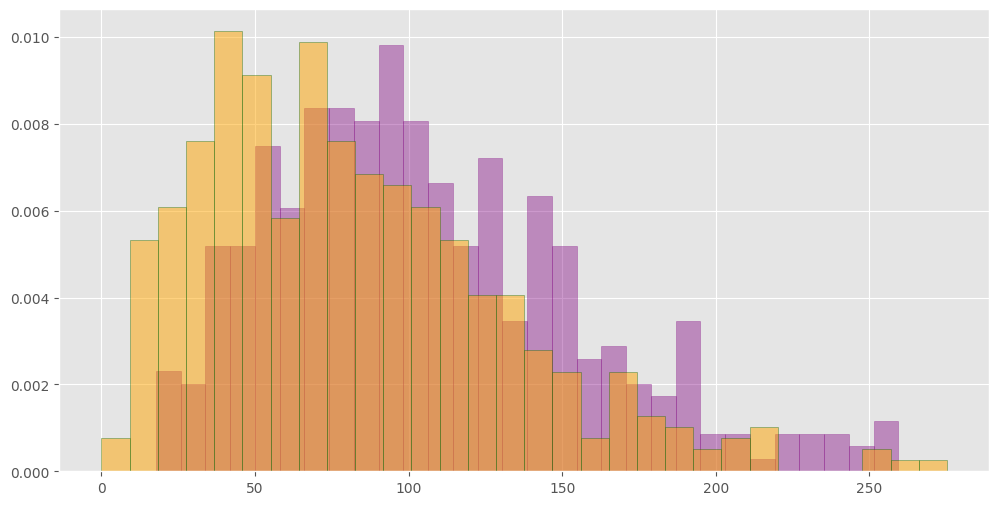

In [581]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(mayo_wex['mayo_rain'], bins=30, density=True, color="purple", ec="purple" , alpha = 0.4)
ax.hist(mayo_wex['wexford_rain'], bins=30, density=True, color="orange", ec="darkgreen" , alpha = 0.5)

<Axes: xlabel='mayo_rain', ylabel='Density'>

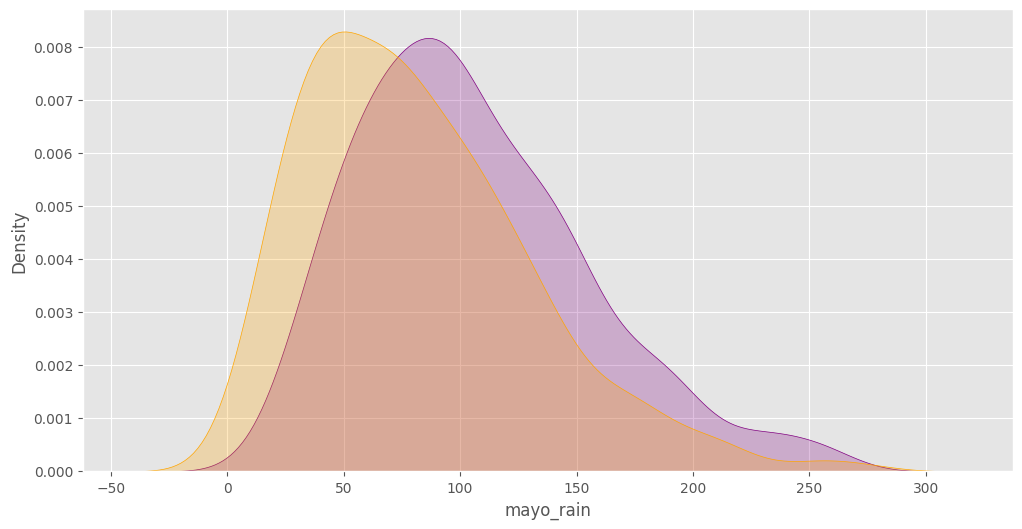

In [582]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(mayo_wex['mayo_rain'], fill=True, color="Purple")
sns.kdeplot(mayo_wex['wexford_rain'], fill=True, color="Orange")


In [583]:
mayo_size = mayo_wex['mayo_rain'].count()
mayo_size

430

In [584]:
mayo_mean = mayo_wex['mayo_rain'].mean()
mayo_mean

105.54465116279071

In [585]:
mayo_std = mayo_wex['mayo_rain'].std()
mayo_std

50.105548332038566

In [586]:
wex_size = mayo_wex['wexford_rain'].count()
wex_size

430

In [587]:
wex_mean = mayo_wex['wexford_rain'].mean()
wex_mean

81.70930232558139

In [588]:
wex_std = mayo_wex['wexford_rain'].std()
wex_std

49.209471930891965

In [589]:
sample1 = np.random.normal(mayo_mean, mayo_std, mayo_size)
sample2 = np.random.normal(wex_mean, wex_std, wex_size)

In [590]:
# Perform the t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

In [591]:
# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.884467272862733
P-value: 5.722619912171255e-09


Given the high t-statistic and the extremely low p-value, one can conclude that the difference in means between the two samples is statistically significant, meaning it is very unlikely that the observed difference occurred by chance, and there is a strong indication of a real difference in the population means.

### Combine All Data

In [592]:
co2andtemp = pd.concat([year_co2, year_temp], axis=1)

In [593]:
combined = pd.concat([co2andtemp, year_ch4, ireland_rain_df], axis =1)

In [594]:
combined

year_co2  CO2 (ppmv)  year_temp   temp  GasAge  CH4mean  mayo_date  \
0       2001.0      368.02       2000  218.3  1937.0    907.0 1956-09-01   
1       1998.0      361.78       1993  218.3  1824.0    784.0 1956-10-01   
2       1996.0      359.65       1987  218.3  1820.0    762.0 1956-11-01   
3       1994.0      357.11       1981  218.3  1799.0    710.0 1956-12-01   
4       1993.0      353.95       1974  218.3  1766.0    727.0 1957-01-01   
...        ...         ...        ...    ...     ...      ...        ...   
5814       NaN         NaN    -814921  211.0     NaN      NaN        NaT   
5815       NaN         NaN    -815743  211.2     NaN      NaN        NaT   
5816       NaN         NaN    -816555  211.3     NaN      NaN        NaT   
5817       NaN         NaN    -817353  211.4     NaN      NaN        NaT   
5818       NaN         NaN    -818143  211.4     NaN      NaN        NaT   

      mayo_rain   wex_date  wexford_rain  
0          49.9 1987-09-01         100.5  
1          98.8 1987-10-01         176.7  
2          51.6 1987-11-01          67.7  
3         180.6 1987-12-01          91.5  
4         148.5 1988-01-01         205.4  
...         ...        ...           ...  
5814        NaN        NaT           NaN  
5815        NaN        NaT           NaN  
5816        NaN        NaT           NaN  
5817        NaN        NaT           NaN  
5818        NaN        NaT           NaN  

[5819 rows x 10 columns]

In [595]:
combined.to_csv('combined_data.csv', index=False) 

In [596]:
combined.to_json('combined_data.json', orient='records') 

In [597]:
combined_cleaned = combined.dropna()

In [598]:
combined_cleaned

year_co2  CO2 (ppmv)  year_temp   temp   GasAge  CH4mean  mayo_date  \
0      2001.0      368.02       2000  218.3   1937.0    907.0 1956-09-01   
1      1998.0      361.78       1993  218.3   1824.0    784.0 1956-10-01   
2      1996.0      359.65       1987  218.3   1820.0    762.0 1956-11-01   
3      1994.0      357.11       1981  218.3   1799.0    710.0 1956-12-01   
4      1993.0      353.95       1974  218.3   1766.0    727.0 1957-01-01   
..        ...         ...        ...    ...      ...      ...        ...   
425  -11009.0      240.71      -5269  216.8 -31110.0    428.0 1992-02-01   
426  -11030.0      237.15      -5291  215.9 -31198.0    440.0 1992-03-01   
427  -11051.0      239.42      -5313  216.1 -31252.0    443.0 1992-04-01   
428  -11071.0      234.68      -5336  216.3 -31298.0    444.0 1992-05-01   
429  -11093.0      238.86      -5358  217.3 -31530.0    461.0 1992-06-01   

     mayo_rain   wex_date  wexford_rain  
0         49.9 1987-09-01         100.5  
1         98.8 1987-10-01         176.7  
2         51.6 1987-11-01          67.7  
3        180.6 1987-12-01          91.5  
4        148.5 1988-01-01         205.4  
..         ...        ...           ...  
425      126.7 2023-04-01          62.5  
426      130.3 2023-05-01          34.7  
427       95.0 2023-06-01          71.3  
428       43.8 2023-07-01         117.5  
429       38.2 2023-08-01          88.9  

[430 rows x 10 columns]

### Predictions

In [599]:
X = combined_cleaned[['CO2 (ppmv)', 'CH4mean']]
y = combined_cleaned['temp']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsRegressor

# Choose the number of neighbors (k) and create the model
k = 3  # You can adjust this value
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_model.fit(X_train, y_train)

new_data = pd.DataFrame({ 
    'CO2 (ppmv)': [],  # Replace with your actual feature values
    'CH4mean': []})

# Assuming 'new_data' is your new dataset for future predictions
new_predictions = knn_model.predict(new_data)

import matplotlib.pyplot as plt

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the predicted data points
plt.scatter(X_test, knn_model.predict(X_test), color='red', label='Predicted Data')

# Plot the line of predictions for future data
plt.plot(new_data, new_predictions, color='green', linewidth=2, label='Future Predictions')

# Add labels and legend
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()

# Show the plot
plt.show()



ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by KNeighborsRegressor.

In [ ]:
import pandas as pd
import statsmodels.api as sm


# Perform the regression analysis
X = combined[['CO2 (ppmv)', 'temp']]
y = combined['CH4mean']

# Handle missing values by dropping rows with missing values
data = pd.concat([X, y], axis=1).dropna()

X = data[['CO2 (ppmv)', 'temp']]
y = data['CH4mean']

X = sm.add_constant(X)  # Add a constant term to the independent variables

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                CH4mean   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     101.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.56e-42
Time:                        22:34:12   Log-Likelihood:                -11122.
No. Observations:                1901   AIC:                         2.225e+04
Df Residuals:                    1898   BIC:                         2.227e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        285.9952    124.351      2.300      0.0

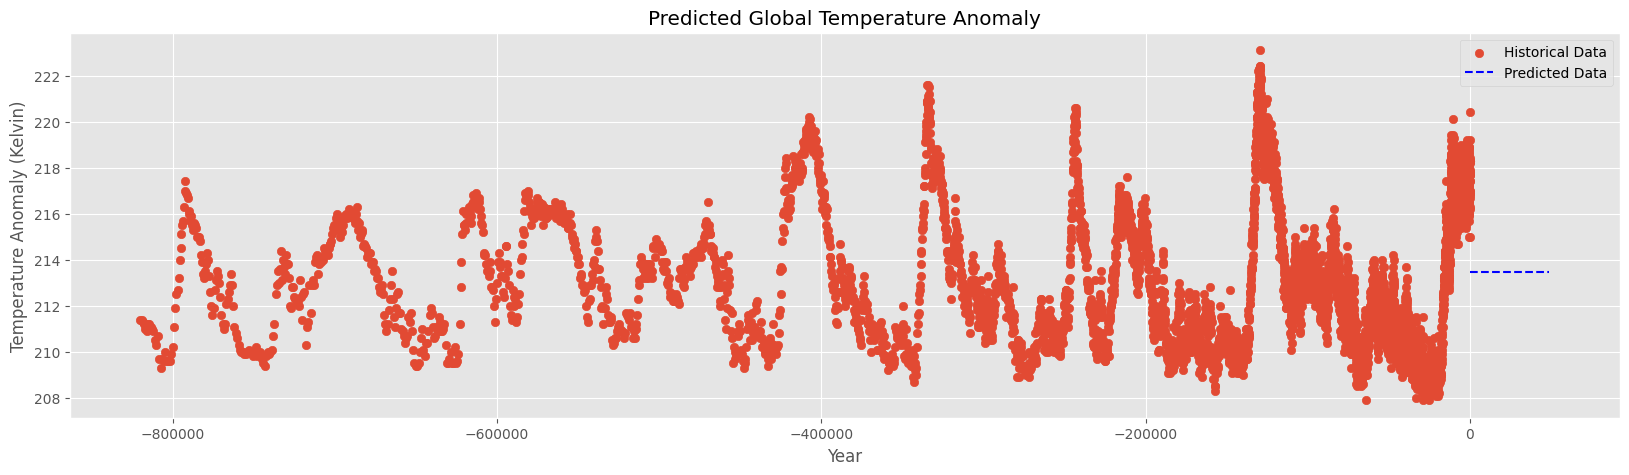

In [ ]:
from sklearn.linear_model import LinearRegression

# Historical data (example data, not real data)
years = combined['year_temp'].to_numpy()
co2_levels = combined['CO2 (ppmv)'].to_numpy()


# Reshape for sklearn
years_reshaped = years.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression().fit(years_reshaped, temp)

# Extrapolate future years
future_years = np.arange(0, 50000, 1000).reshape(-1, 1)
predicted_temperature_anomalies = model.predict(future_years)

# Plot the historical data and predictions
plt.scatter(years, temp, label='Historical Data')
plt.plot(future_years, predicted_temperature_anomalies, label='Predicted Data', linestyle='dashed', color='blue')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (Kelvin)')
plt.title('Predicted Global Temperature Anomaly')
plt.legend()
plt.show()

In [ ]:
new_co2_value = 380
new_temperature_value = 220

# Now you can use the model for prediction if needed
# For example, if you have new data for CO2 and Temperature, you can predict Methane values
new_data = pd.DataFrame({'CO2': [new_co2_value], 'Temperature': [new_temperature_value]})
new_data = sm.add_constant(new_data)

predicted_methane = model.predict(new_data)
print(predicted_methane)

ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [ ]:
co2 = combined['CO2 (ppmv)'].to_numpy()
temp = combined['temp'].to_numpy()

In [ ]:
co2 = co2.reshape(-1,1)
temp = temp.reshape(-1,1)

In [ ]:
lr = LinearRegression()
lr.fit(co2)

TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'

### References

[1] pandas.pydata.org. (n.d.). pandas.DataFrame.apply — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html. [Accessed 20 Dec. 2023].

[2] Marsja, E. (2023). Combine Year and Month Columns in Pandas. [online] Erik Marsja. Available at: https://www.marsja.se/combine-year-and-month-columns-in-pandas/ [Accessed 20 Dec. 2023].‌

[3] Stack Overflow. (n.d.). python - How to change the figure size of a seaborn axes or figure level plot. [online] Available at: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot. [Accessed 20 Dec. 2023].

[4] matplotlib.org. (n.d.). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html. [Accessed 20 Dec. 2023]

[6] Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer, J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter, F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, J.L. Tison, M. Werner, and E.W. Wolff.  2007. Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years. Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.

[7] Loulergue, L., A. Schilt, R. Spahni, V. Masson-Delmotte, T. Blunier, B. Lemieux, J.-M. Barnola, D. Raynaud, T.F. Stocker, and J. Chappellaz. 2008. Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature, Vol. 453, pp. 383-386, 15 May 2008. doi:10.1038/nature06950. Noaa.gov. (2013). Available at: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt [Accessed 20 Dec. 2023]. ‌

[8] Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949

[9] Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.


[10] Stack Overflow. (n.d.). python - How to make inline plots in Jupyter Notebook larger? [online] Available at: https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger. [Accessed 21 Dec. 2023]. 

‌

Pursuit. (2017). Key greenhouse gases higher than any time over last 800,000 years. [online] Available at: https://pursuit.unimelb.edu.au/articles/key-greenhouse-gases-higher-than-any-time-over-last-800-000-years.

pandas.pydata.org. (n.d.). pandas.DataFrame.astype — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html. [Accessed 21 Dec. 2023]. 

‌

Fusio.net. (2023). Available at: https://cli.fusio.net/cli/climate_data/webdata/mly2375.zip [Accessed 21 Dec. 2023].

‌

Nik (2023). Converting Pandas DataFrame Column from Object to Float • datagy. [online] datagy. Available at: https://datagy.io/pandas-convert-object-to-float/ [Accessed 22 Dec. 2023].

‌

Stack Overflow. (n.d.). python - Different colors for points and line in Seaborn regplot. [online] Available at: https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot.

‌

Stack Overflow. (n.d.). scatter plot with multiple X features and single Y in Python. [online] Available at: https://stackoverflow.com/questions/59140950/scatter-plot-with-multiple-x-features-and-single-y-in-python [Accessed 22 Dec. 2023].

‌